# Time Independent Fourier Transform

In [2]:
#Importing the libraries to watch the 'fits' image and get the data array
import astropy
import plotly.graph_objects as go
from astropy.io import fits
#Importing a library that is useful to read the original file
import pandas as pd
import pylab as plb
import matplotlib.pyplot as plt
from scipy.stats import chisquare

from scipy.optimize import curve_fit
from scipy import asarray as ar,exp
#Importing a visual library with some illustrative set up
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors 
from matplotlib import cm
import numpy as np
import math 
from sklearn.metrics import mean_squared_error
import seaborn as sns
from scipy import signal
plt.style.use('fivethirtyeight')
plt.rcParams['font.family'] = 'sans-serif' 
plt.rcParams['font.serif'] = 'Ubuntu' 
plt.rcParams['font.monospace'] = 'Ubuntu Mono' 
plt.rcParams['font.size'] = 14 
plt.rcParams['axes.labelsize'] = 12 
plt.rcParams['axes.labelweight'] = 'bold' 
plt.rcParams['axes.titlesize'] = 12 
plt.rcParams['xtick.labelsize'] = 12 
plt.rcParams['ytick.labelsize'] = 12 
plt.rcParams['legend.fontsize'] = 12 
plt.rcParams['figure.titlesize'] = 12 
plt.rcParams['image.cmap'] = 'jet' 
plt.rcParams['image.interpolation'] = 'none' 
plt.rcParams['figure.figsize'] = (16, 8) 
plt.rcParams['lines.linewidth'] = 2 
plt.rcParams['lines.markersize'] = 8
plt.rcParams["axes.grid"] = False

colors = ['xkcd:pale orange', 'xkcd:sea blue', 'xkcd:pale red', 'xkcd:sage green', 'xkcd:terra cotta', 'xkcd:dull purple', 'xkcd:teal', 'xkcd: goldenrod', 'xkcd:cadet blue',
'xkcd:scarlet']
cmap_big = cm.get_cmap('Spectral', 512)
cmap = mcolors.ListedColormap(cmap_big(np.linspace(0.7, 0.95, 256))) 
bbox_props = dict(boxstyle="round,pad=0.3", fc=colors[0], alpha=.5)

In [3]:
data=pd.read_csv('data.csv',sep=';')

In [4]:
data=data.rename(columns={'Data':'Day','Godzina':'hour','Minuty':'minutes','Wolumen':'Load'})

In [5]:
#Building a continous time array
data['seconds']=np.arange(0,len(data)*900,900)

In [7]:
detrended_sig=signal.detrend(data.Load)
sig=detrended_sig*np.hanning(len(detrended_sig))

## Uniform varying threshold

In [8]:
#Computing the FFT
FFT=np.fft.fft(sig)

In [9]:
#Constructing the period x axis with the hours
new_N=int(len(FFT)/2) 
f_nat=1/900
new_X = np.linspace(10**-12, f_nat/2, new_N, endpoint=True)
new_Xph=1.0/(new_X*60*60)

(0.0, 200.0)

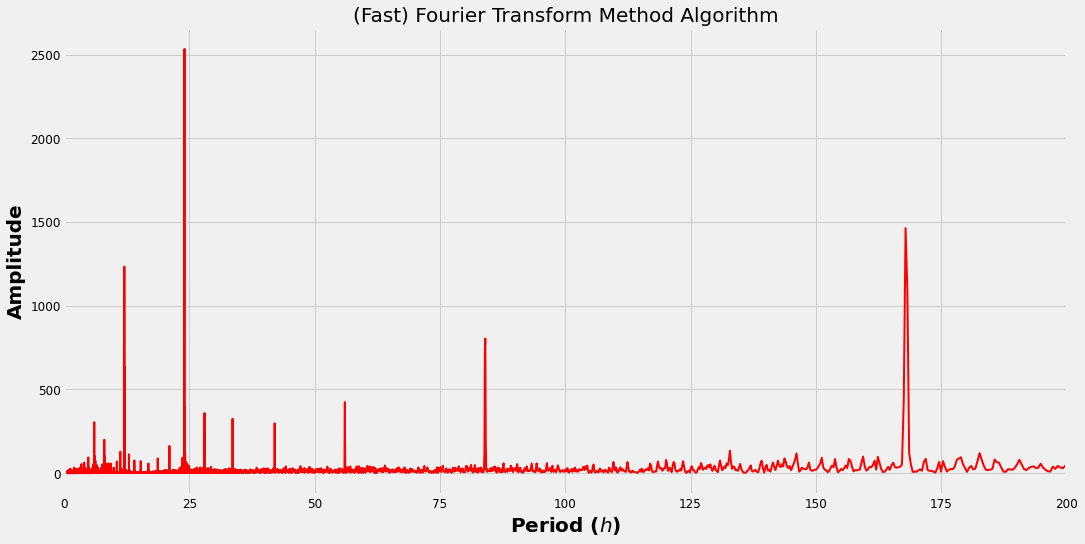

In [10]:
FFT_abs=np.abs(FFT)
plt.plot(new_Xph,2*FFT_abs[0:int(len(FFT)/2.)]/len(new_Xph),color='red')
plt.xlabel('Period ($h$)',fontsize=20)
plt.ylabel('Amplitude',fontsize=20)
plt.title('(Fast) Fourier Transform Method Algorithm',fontsize=20)
plt.grid(True)
plt.xlim(0,200)

/Users/pierohmd/opt/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


Text(0, 0.5, 'Original Signal')

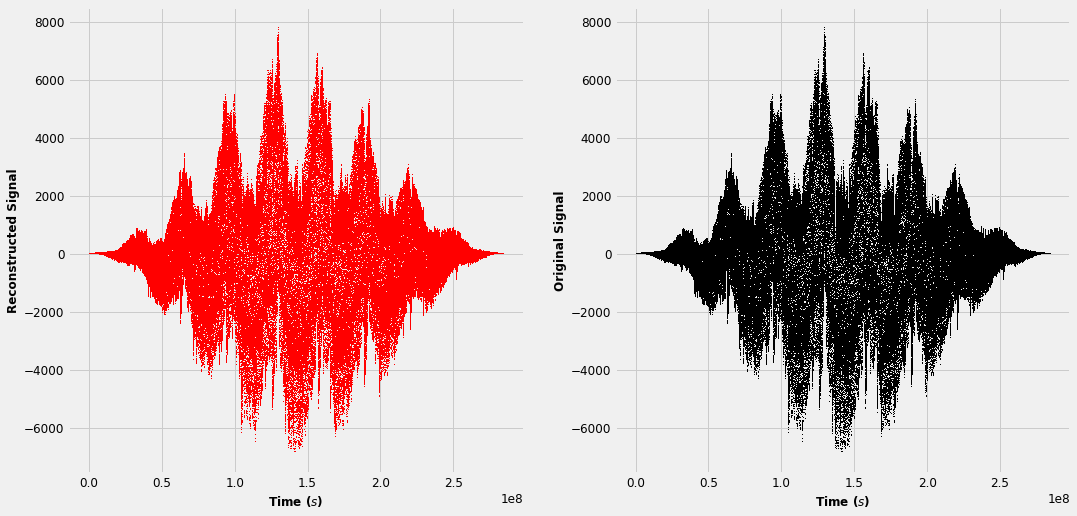

In [11]:
#Minimal difference has been shown in the reconstruction
plt.subplot(1,2,1)
plt.plot(data.seconds,np.fft.ifft(FFT),',',color='red')
plt.grid(True)
plt.xlabel('Time ($s$)')
plt.ylabel('Reconstructed Signal')
plt.subplot(1,2,2)
plt.plot(data.seconds,sig,',',color='k')
plt.grid(True)
plt.xlabel('Time ($s$)')
plt.ylabel('Original Signal')

In [12]:
#Defining the filtering function
def fft_filter(th):
    fft_tof=FFT.copy()
    fft_tof_abs=np.abs(fft_tof)
    fft_tof_abs=2*fft_tof_abs/len(new_Xph)
    fft_tof[fft_tof_abs<=th]=0
    return fft_tof

In [13]:
#Computing the RMSE for each reconstruction
K=np.arange(0,2475+75,75)
RMSE=[]
for k in K: 
    rec_four=fft_filter(k)
    rec=np.fft.ifft(rec_four)
    RMSE.append(np.sqrt(mean_squared_error(rec.real,sig)))

([<matplotlib.axis.XTick at 0x7f9761d1cca0>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

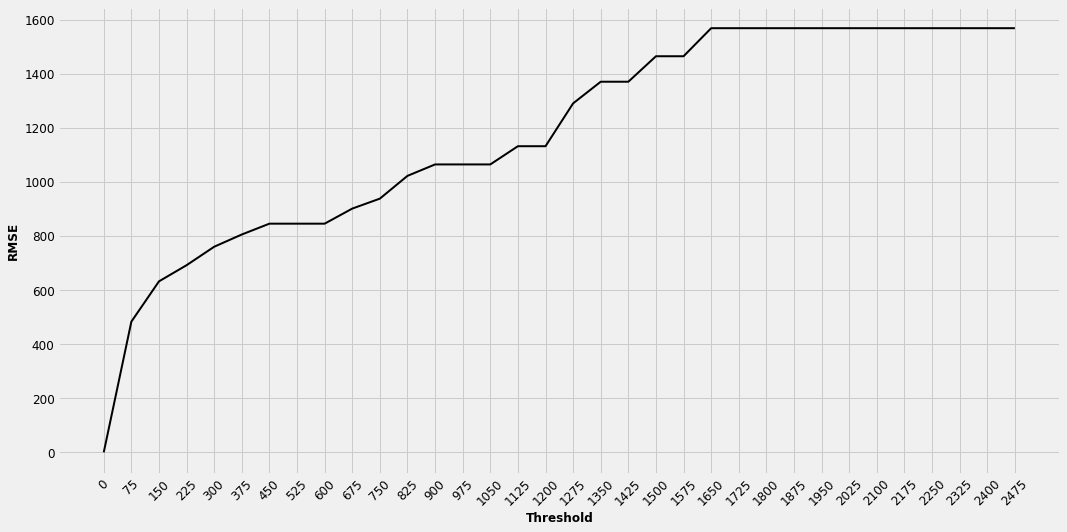

In [14]:
plt.plot(K,RMSE,color='k')
plt.xlabel('Threshold')
plt.ylabel('RMSE')
plt.grid(True)
plt.xticks(K,rotation=45)

In [15]:
#Showing the plots at different thresholds values
#Defining the amplitude filtering function
def fft_filter_amp(th):
    fft_tof=FFT.copy()
    fft_tof_abs=np.abs(fft_tof)
    fft_tof_abs=2*fft_tof_abs/len(new_Xph)
    fft_tof_abs[fft_tof_abs<=th]=0
    return fft_tof_abs[0:int(len(fft_tof_abs)/2.)]

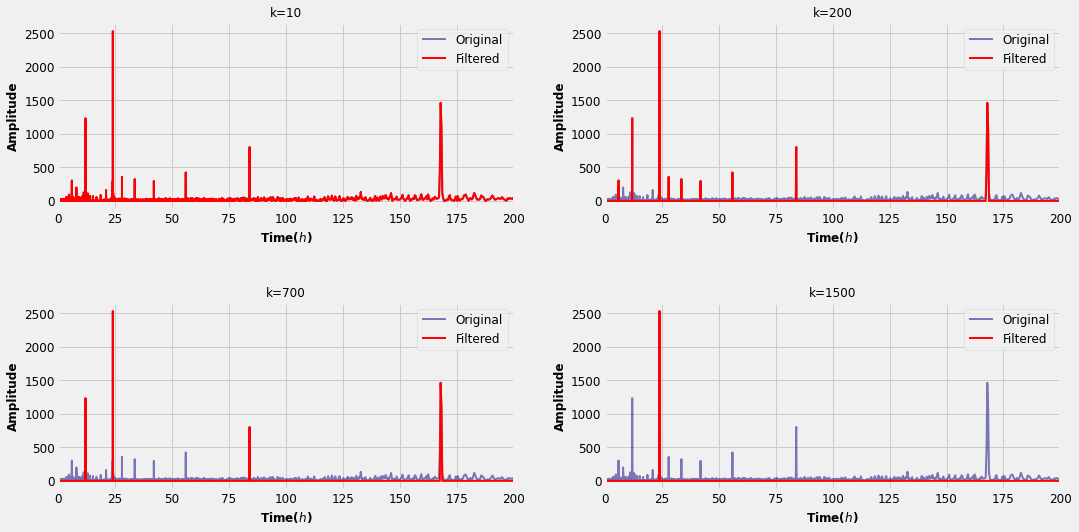

In [16]:
K_plot=[10,200,700,1500]
j=0
for k in K_plot:
    j=j+1
    plt.subplot(2,2,j)
    plt.title('k=%i'%(k))
    plt.xlim(0,200)
    plt.plot(new_Xph,2*FFT_abs[0:int(len(FFT)/2.)]/len(new_Xph),color='navy',alpha=0.5,label='Original')
    plt.grid(True)
    plt.plot(new_Xph,fft_filter_amp(k),'red',label='Filtered')
    plt.xlabel('Time($h$)')
    plt.ylabel('Amplitude')
    plt.legend()
plt.subplots_adjust(hspace=0.5)


## Maximum related threshold

In [17]:
#Maximum relate filter function
def fft_filter(perc):
    th=perc*(2*FFT_abs[0:int(len(FFT)/2.)]/len(new_Xph)).max()
    fft_tof=FFT.copy()
    fft_tof_abs=np.abs(fft_tof)
    fft_tof_abs=2*fft_tof_abs/len(new_Xph)
    fft_tof[fft_tof_abs<=th]=0
    return fft_tof

/Users/pierohmd/opt/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/Users/pierohmd/opt/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/Users/pierohmd/opt/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/Users/pierohmd/opt/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


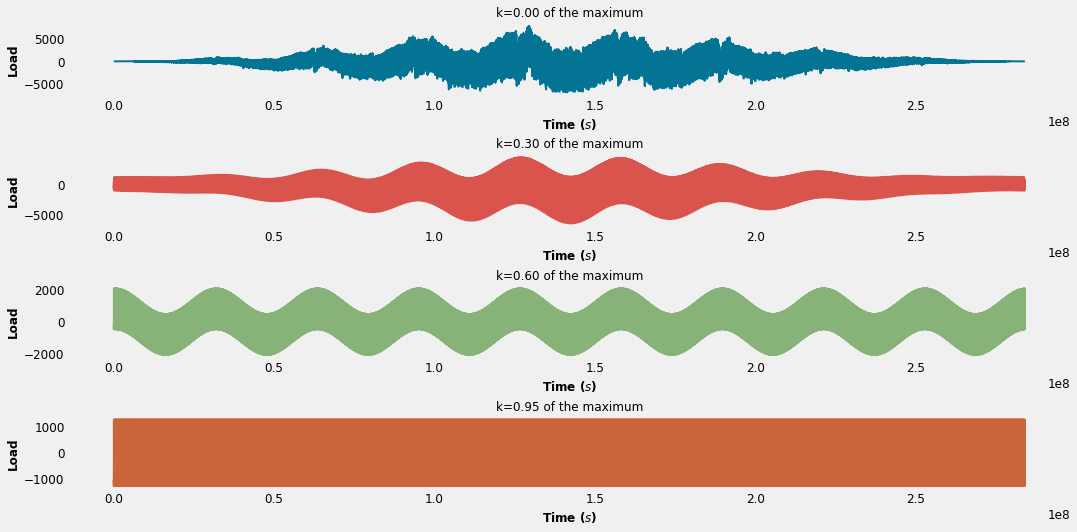

In [18]:
#Showing some plots at different threshold values
K_plot_values=[0.0,0.30,0.60,0.95]
j=0
for k in K_plot_values:
    j+=1
    plt.subplot(4,1,j)
    plt.plot(data.seconds,np.fft.ifft(fft_filter(k)),color=colors[j])
    plt.title('k=%.2f of the maximum' %(k))
    plt.xlabel('Time ($s$)')
    plt.ylabel('Load')
plt.subplots_adjust(hspace=0.8)


In [19]:
#Performing the same RMSE process as before, but relating to the maximum value 
#Computing the RMSE for each reconstruction
K=np.arange(0.0,0.31,0.01)
RMSE=[]
for k in K: 
    rec_four=fft_filter(k)
    rec=np.fft.ifft(rec_four)
    RMSE.append(np.sqrt(mean_squared_error(rec.real,sig)))

Text(0, 0.5, 'RMSE')

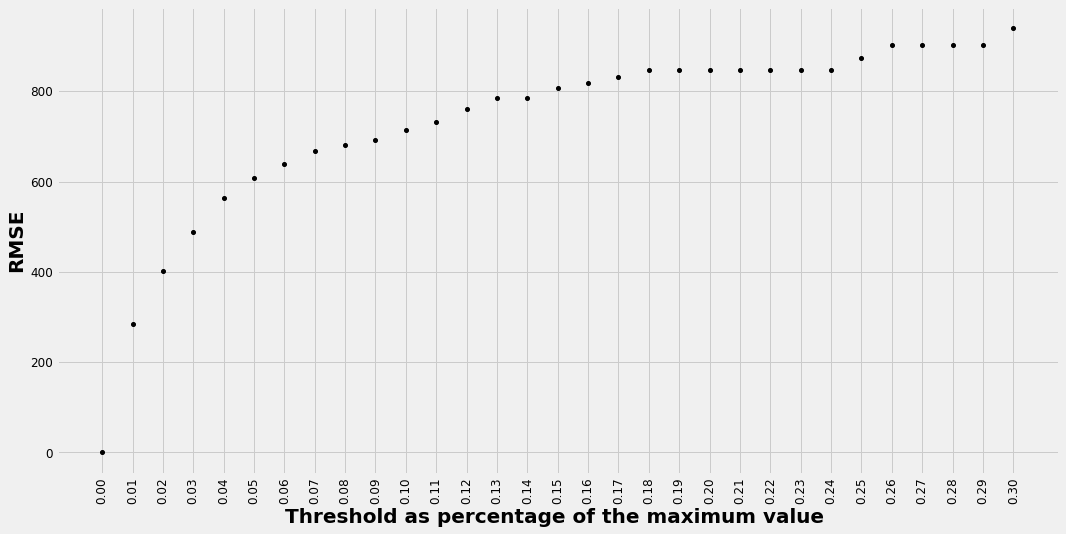

In [20]:
plt.plot(K,RMSE,'.',color='k')
plt.grid(True)
plt.xlabel('Threshold as percentage of the maximum value ',fontsize=20)
plt.xticks(K,rotation=90)
plt.ylabel('RMSE',fontsize=20,rotation=90)

In [21]:
#Computing the correlation between the original signal and its error
CORR=[]
for k in K: 
    rec_four=fft_filter(k)
    rec=np.fft.ifft(rec_four)
    error=rec.real-sig
    CORR.append(np.abs(np.corrcoef(sig,error)[0][1]))

Text(0, 0.5, 'Correlation Coefficient')

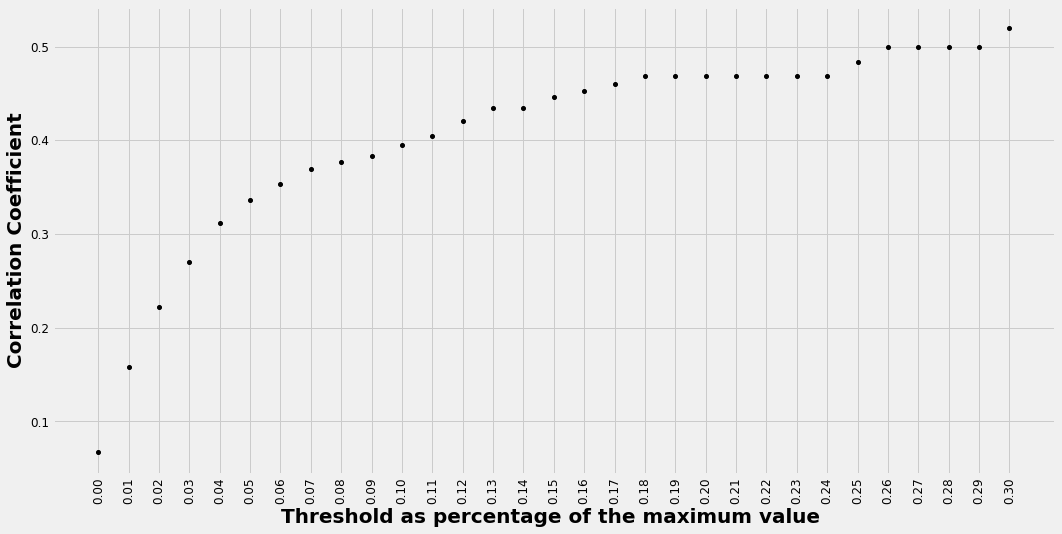

In [22]:
#Plotting the correlation between the signal and its error
plt.plot(K,CORR,'.',color='k')
plt.grid(True)
plt.xlabel('Threshold as percentage of the maximum value ',fontsize=20)
plt.xticks(K,rotation=90)
plt.ylabel('Correlation Coefficient',fontsize=20,rotation=90)

Text(0, 0.5, 'Correlation Coefficient')

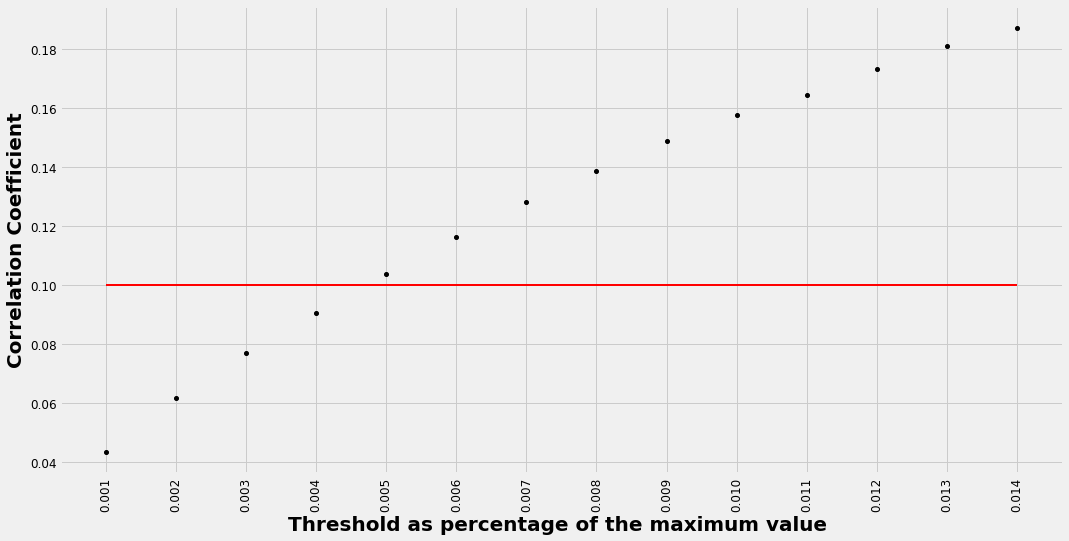

In [23]:
#Reducing the range and selecting the best K value 
K=np.arange(0.001,0.015,0.001)
CORR=[]
for k in K: 
    rec_four=fft_filter(k)
    rec=np.fft.ifft(rec_four)
    error=rec.real-sig
    CORR.append(np.abs(np.corrcoef(sig,error)[0][1]))
plt.plot(K,CORR,'.',color='k')
plt.plot(K,np.zeros(len(K))+0.10,color='red')
plt.grid(True)
plt.xlabel('Threshold as percentage of the maximum value ',fontsize=20)
plt.xticks(K,rotation=90)
plt.ylabel('Correlation Coefficient',fontsize=20,rotation=90)

/Users/pierohmd/opt/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


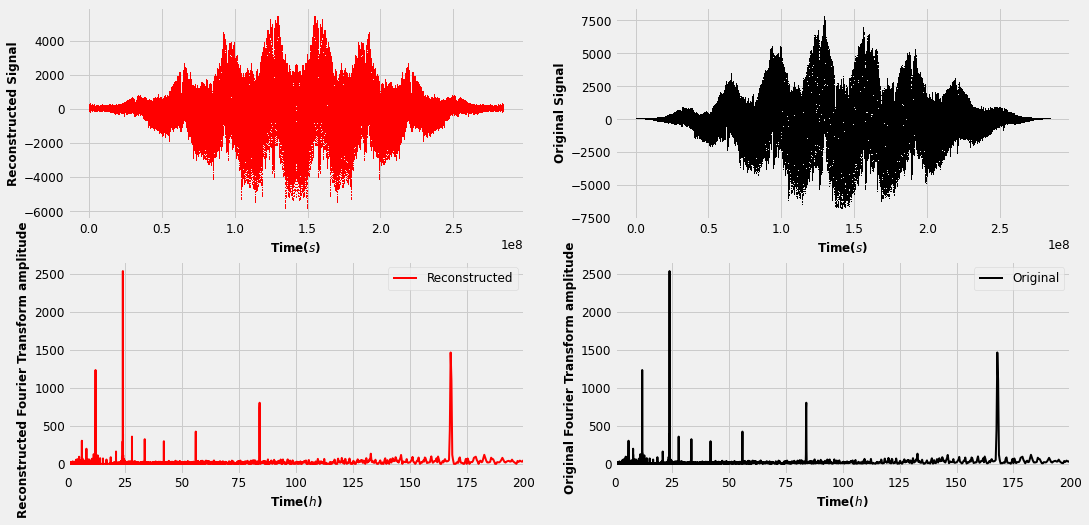

In [24]:
#Displaying the optimum values
opt_perc=0.004
plt.subplot(2,2,1)
plt.plot(data.seconds,np.fft.ifft(fft_filter(opt_perc).real),',',color='red')
plt.grid(True)
plt.xlabel('Time($s$)')
plt.ylabel('Reconstructed Signal')
plt.subplot(2,2,2)
plt.plot(data.seconds,sig,',',color='k')
plt.grid(True)
plt.xlabel('Time($s$)')
plt.ylabel('Original Signal')
plt.subplot(2,2,4)
plt.xlim(0,200)
plt.plot(new_Xph,2*FFT_abs[0:int(len(FFT)/2.)]/len(new_Xph),color='k',alpha=1.0,label='Original')
plt.legend()

plt.grid(True)
plt.xlabel('Time($h$)')
plt.ylabel('Original Fourier Transform amplitude')
plt.subplot(2,2,3)
plt.xlim(0,200)
plt.plot(new_Xph,2*np.abs(fft_filter(opt_perc))[0:int(len(FFT)/2.)]/len(new_Xph),color='red',alpha=1.0,label='Reconstructed')
plt.grid(True)
plt.xlabel('Time($h$)')
plt.ylabel('Reconstructed Fourier Transform amplitude ')
plt.legend()



Text(0, 0.5, 'Distribution')

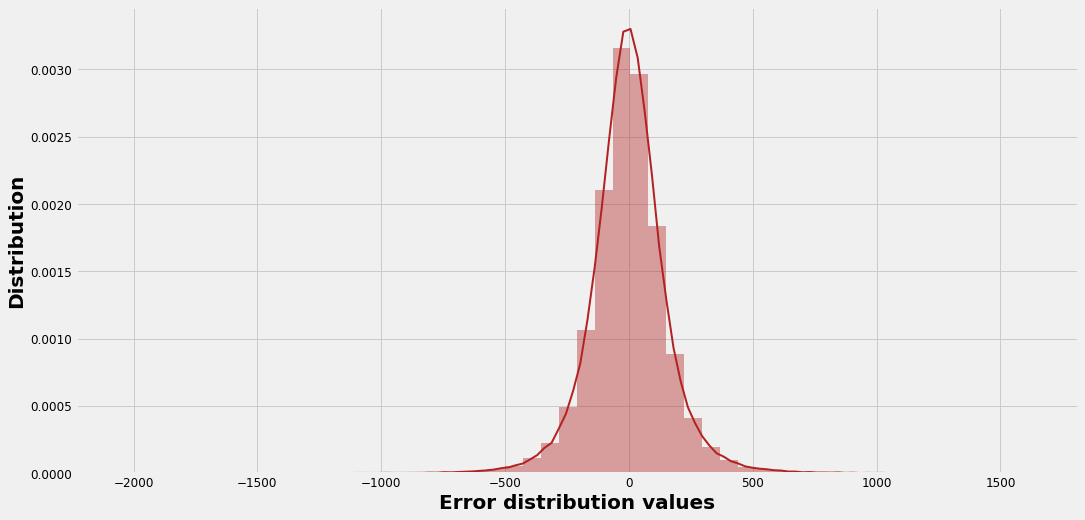

In [25]:
#Distribution of the error
sns.distplot(sig-np.fft.ifft(fft_filter(opt_perc)).real,color='firebrick')
plt.grid(True)
plt.xlabel('Error distribution values',fontsize=20)
plt.ylabel('Distribution',fontsize=20)

In [26]:
y_1=np.histogram(sig-np.fft.ifft(fft_filter(opt_perc)).real,500)[0]
x_1=np.histogram(sig-np.fft.ifft(fft_filter(opt_perc)).real,500)[1][0:len(y_1)]

In [27]:

def gaus(x,a,x0,sigma):
        return a*np.exp(-(x-x0)**2/(2*sigma**2))

In [28]:
#x_1=x_1[np.where((x_1>-500) & (x_1<500))]
y_1=y_1[np.where((x_1>-500) & (x_1<500))]
x_1=np.linspace(-500,500,len(y_1))

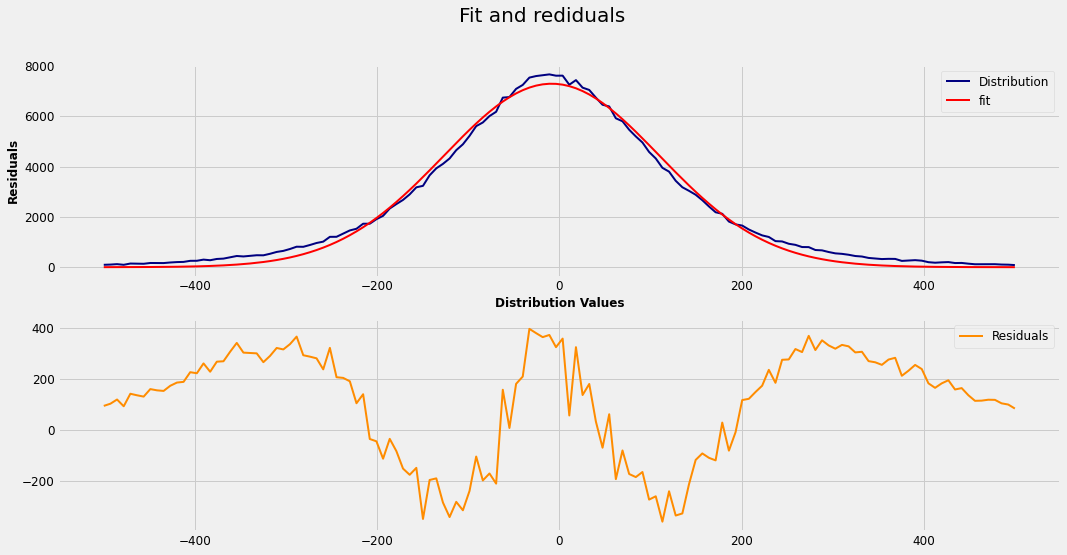

In [29]:
#Plot of the values
val_medio=0
n = len(x_1)                       #the number of data
mean = sum(x_1*y_1)/n                   #note this correction
sigma = sum(y_1*(x_1-val_medio)**2)/n        #note this correction
p0 = [max(y_1),val_medio,10]
popt,pcov = curve_fit(gaus,x_1,y_1,p0=p0)
fig, (ax_11, ax_12) = plt.subplots(2, 1)
plt.suptitle('Fit and rediduals',fontsize=20)
#ax_11.set_y_1_label('Intensity_1 [ADU]')
ax_11.plot(x_1,y_1,'navy',label='Distribution')
ax_11.grid(True)
ax_11.set_xlabel('Distribution Values')
ax_11.set_ylabel('Distribution')

#plt.y_1label('Residuals')
ax_11.plot(x_1,gaus(x_1,*popt),'red',label='fit')
plt.grid(True)
ax_11.legend()
res = y_1 - gaus(x_1,*popt)
ax_12.plot(x_1,res,color='darkorange',label='Residuals')
ax_11.set_xlabel('Distribution Values')
ax_11.set_ylabel('Residuals')
ax_12.legend()
plt.show()


## Prediction Part

# Train Test Split

In [30]:
#Selecting the first 80% of the signal
sig=data.Load
sig=signal.detrend(sig)
sig=sig[0:365*96*8].copy()
FFT=np.fft.fft(sig)
FFT_abs=np.abs(FFT)

In [31]:
#Maximum relate filter function
def fft_filter(perc):
    sig=data.Load
    sig=signal.detrend(sig)
    sig=sig[0:365*96*8].copy()
    FFT=np.fft.fft(sig)
    FFT_abs=np.abs(FFT)
    th=perc*(2*FFT_abs[0:int(len(FFT)/2.)]/len(new_Xph)).max()
    fft_tof=FFT.copy()
    fft_tof_abs=np.abs(fft_tof)
    fft_tof_abs=2*fft_tof_abs/len(new_Xph)
    fft_tof[fft_tof_abs<=th]=0
    return fft_tof

In [32]:
#Performing the same RMSE process as before, but relating to the maximum value 
#Computing the RMSE for each reconstruction
K=np.arange(0.001,0.011,0.001)
RMSE=[]
CORR=[]
for k in K: 
    rec_four=fft_filter(k)
    rec=np.fft.ifft(rec_four)
    RMSE.append(np.sqrt(mean_squared_error(rec.real,sig)))
    rec=np.fft.ifft(rec_four)
    error=rec.real-sig
    CORR.append(np.abs(np.corrcoef(sig,error)[0][1]))

Text(0, 0.5, 'Correlation')

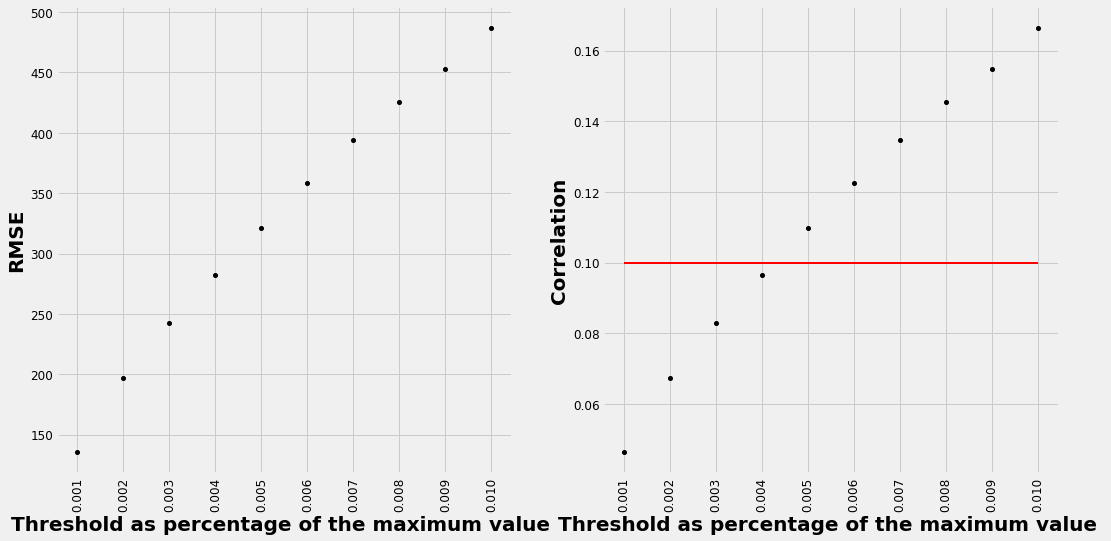

In [33]:
plt.subplot(1,2,1)
plt.plot(K,RMSE,'.',color='k')
plt.grid(True)
plt.xlabel('Threshold as percentage of the maximum value ',fontsize=20)
plt.xticks(K,rotation=90)
plt.ylabel('RMSE',fontsize=20,rotation=90)
plt.subplot(1,2,2)
plt.plot(K,CORR,'.',color='k')
plt.grid(True)
plt.xlabel('Threshold as percentage of the maximum value ',fontsize=20)
plt.plot(K,np.zeros(len(K))+0.10,color='red')
plt.xticks(K,rotation=90)
plt.ylabel('Correlation',fontsize=20,rotation=90)

Text(0.5, 1.0, 'Fourier Spectrum')

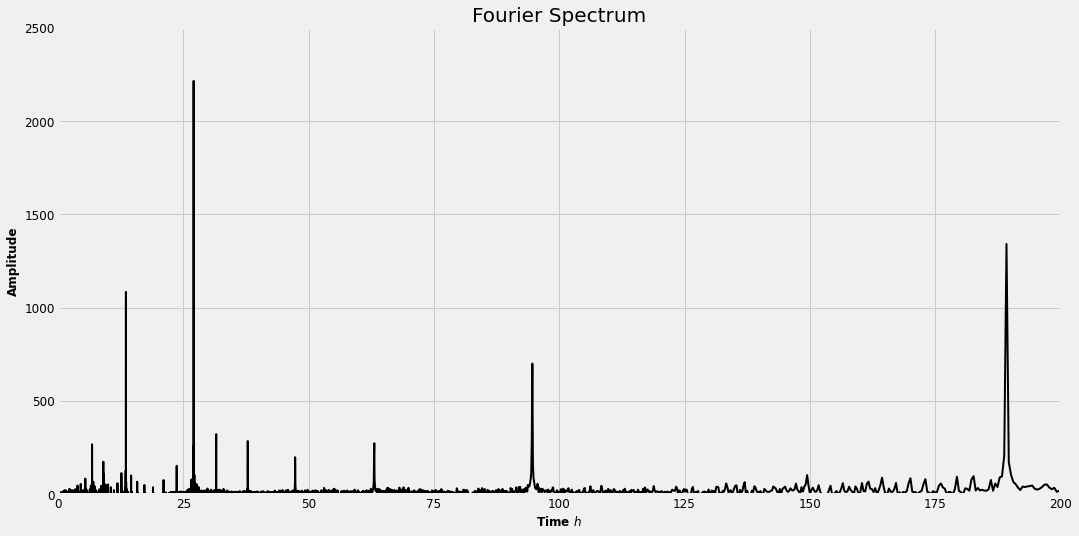

In [34]:
opt_perc=0.004
fft_filter(opt_perc)
plt.xlim(0,200)
plt.ylim(0,2500)
plt.plot(new_Xph,np.abs(fft_filter(opt_perc))[0:len(new_Xph)]/len(new_Xph),color='k',alpha=1.,label='Original')
plt.xlabel('Time $h$')
plt.ylabel('Amplitude')
plt.grid(True)
plt.title('Fourier Spectrum',fontsize=20)


In [203]:
#Prediction:
#Using the Fourier formula 
fourier=fft_filter(opt_perc)
space=np.array(data.seconds.tolist())
f_nat=1/(space[1]-space[0])
P=np.pi*2
#N=int(len(space)/2)
freq=np.linspace(0,f_nat/2,len(fourier))*2*np.pi
#fourier=f_try[1]
J_LIST=np.where(fourier!=0)[0]
real=fourier.real
imag=fourier.imag
T=np.linspace(0,f_nat/2,len(freq),endpoint=True)
I=np.arange(1,101,1)
x_t=np.zeros(len(space))
q=0
SEEN=[]
for j in J_LIST:
    q=q+1
    x_t=x_t+2/(len(space))*(np.abs(fourier[j].real)*np.cos(freq[j]*2*space)-fourier[j].imag*np.sin(2*freq[j]*space))
#print(i,len(space))
    if int(100*q/len(J_LIST)) in I and int(100*q/len(J_LIST)) not in SEEN:
        print('%i'%(int(100*q/len(J_LIST)))+ ' % of the frequencies reconstructed')
        SEEN.append(int(100*q/len(J_LIST)))
    #X_T.append(x_t)

1 % of the frequencies reconstructed
2 % of the frequencies reconstructed
3 % of the frequencies reconstructed
4 % of the frequencies reconstructed
5 % of the frequencies reconstructed
6 % of the frequencies reconstructed
7 % of the frequencies reconstructed
8 % of the frequencies reconstructed
9 % of the frequencies reconstructed
10 % of the frequencies reconstructed
11 % of the frequencies reconstructed
12 % of the frequencies reconstructed
13 % of the frequencies reconstructed
14 % of the frequencies reconstructed
15 % of the frequencies reconstructed
16 % of the frequencies reconstructed
17 % of the frequencies reconstructed
18 % of the frequencies reconstructed
19 % of the frequencies reconstructed
20 % of the frequencies reconstructed
21 % of the frequencies reconstructed
22 % of the frequencies reconstructed
23 % of the frequencies reconstructed
24 % of the frequencies reconstructed
25 % of the frequencies reconstructed
26 % of the frequencies reconstructed
27 % of the frequenci

In [200]:
x_t=np.array(x_t)
x_t[np.where(x_t>sig.max())]=sig.max()

/Users/pierohmd/opt/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/Users/pierohmd/opt/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


Text(0, 0.5, 'Load (MW)')

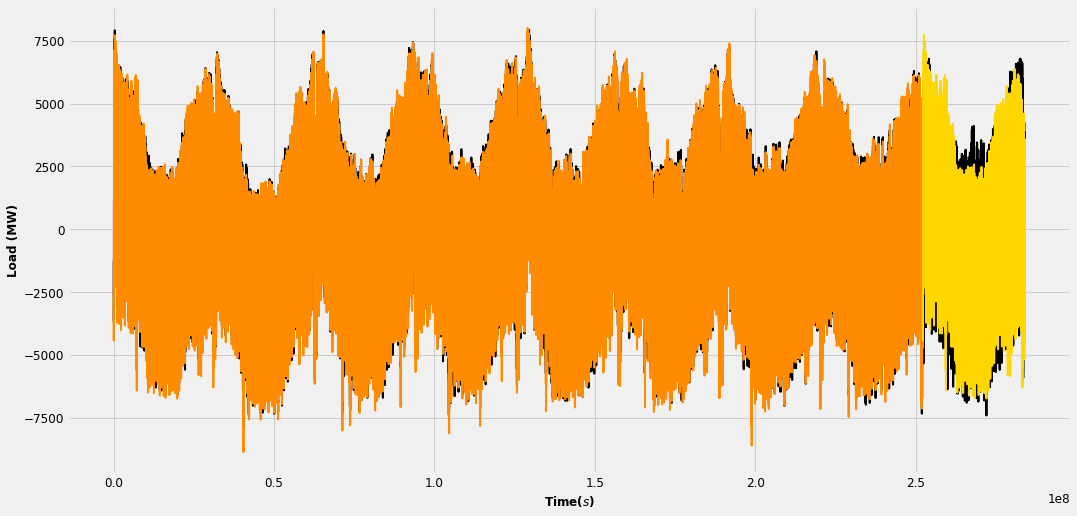

In [312]:
#plt.plot(np.fft.ifft(fourier))
sig=data.Load
sig=signal.detrend(sig)
plt.plot(space,sig,color='k')
plt.plot(space[0:len(fourier)],x_t[0:len(fourier)],color='darkorange')
plt.plot(space[len(fourier):len(data)],x_t[len(fourier):len(data)],color='gold')
plt.grid(True)
plt.xlabel('Time($s$)')
plt.ylabel('Load (MW)')
#plt.plot(space[len(fourier)+10:len(data)],exp,color='black')
#plt.plot(data.seconds[0:365*8*96],np.fft.ifft(fourier))
##plt.plot(data.seconds[365*8*96::],sig[365*8*96::])
#plt.plot(space,x_t*max(sig)/max(x_t))



In [307]:
RMSE=mean_squared_error(sig[365*8*96:len(data)],np.array(x_t[365*8*96:len(data)]).real)


In [309]:
print('RMSE is '+ str(RMSE))

RMSE is 2624.89


/Users/pierohmd/opt/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


Text(0, 0.5, 'Signal')

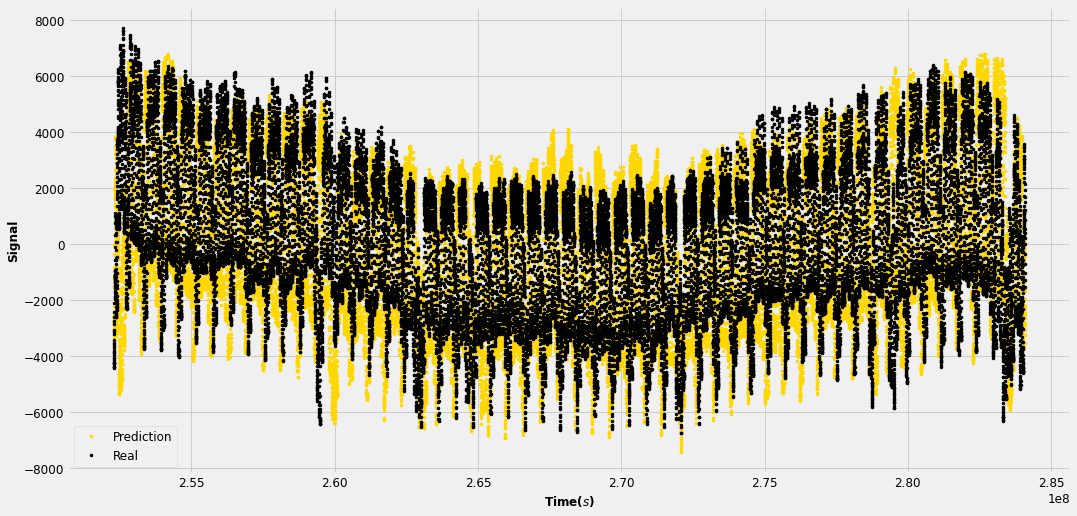

In [314]:
plt.plot(data.seconds[365*8*96:len(data)],sig[365*8*96:len(data)],'.',color='gold',label='Prediction',markersize=5)
plt.plot(data.seconds[365*8*96:len(data)],x_t[365*8*96:len(data)],'.',color='k',label='Real',markersize=5)
plt.legend()
plt.grid(True)
plt.xlabel('Time($s$)')
plt.ylabel('Signal')

/Users/pierohmd/opt/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/Users/pierohmd/opt/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


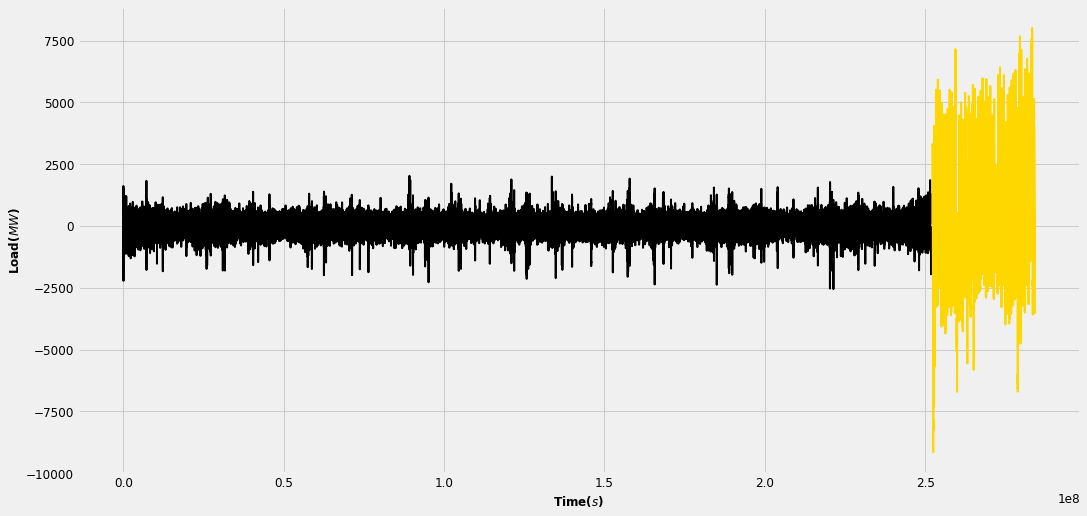

In [321]:
#Plotting the errors
plt.plot(np.array(data.seconds)[0:365*8*96],(sig-x_t)[0:365*8*96],color='k')
plt.plot(np.array(data.seconds)[365*8*96:len(data)],(sig-x_t)[365*8*96:len(data)],color='gold')
plt.xlabel('Time($s$)')
plt.ylabel('Load($MW$)')
plt.grid(True)

In [352]:
#RMSE for each interval

D=[0,20,30,60,90,120]
D=np.array(D)*900
start=365*900*8
T_in=(D+start)[:-1]
T_fin=(D+start)[1::]
D=[0,20,30,60,90,120]
new_D=np.array(D)
new_D=new_D*96
new_start=365*96*8
RMSE=[]
C=[]
for d in range(len(D)-1):
    x_t_=np.array(x_t[(new_start+new_D[d]):(new_start+new_D[d+1])])
    sig_=sig[(new_start+new_D[d]):(new_start+new_D[d+1])]
    error=x_t_.real-sig_
    RMSE.append(np.sqrt(mean_squared_error(sig_,x_t_.real)))
    C.append(np.corrcoef(error,sig_)[0][1])

In [357]:
RMSE_data=pd.DataFrame()
RMSE_data['$T_fin$(s)']=T_fin
RMSE_data['RMSE']=RMSE
RMSE_data['$\Delta T$(s)']=T_fin-T_in
RMSE_data['$C_{data,error}$']=C
RMSE_data['$\Delta Days$']=D[1::]

In [360]:
RMSE_data

,$T_fin$(s),RMSE,$\Delta T$(s),"|$C_{data,error}$|",$\Delta Days$
0,254188800,2569.99,1727100,0.64,20
1,255052800,2439.43,2591100,0.61,30
2,257644800,2458.33,5183100,0.62,60
3,260236800,2780.33,7775100,0.65,90
4,262828800,2686.71,10367100,0.64,120
